In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
# ------------------------ Step 1: Download Stock Data ------------------------
stocks = ['TCS.NS', 'HDFCBANK.NS', 'RELIANCE.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS']
start_date = '2020-01-01'
end_date = '2024-01-01'

data = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

# Check if data was successfully retrieved
if data.isnull().all().all():
    raise ValueError("No data retrieved. Check stock symbols or internet connection.")
else:
    print("Data successfully retrieved.")

[*********************100%***********************]  5 of 5 completed

Data successfully retrieved.


In [20]:
# Compute statistics for adjusted closing prices
stats_adj_close = pd.DataFrame({
    'Min': data.min(),
    'Max': data.max(),
    'Mean': data.mean(),
    'Std': data.std(),
    'Skewness': data.skew(),
    'Kurtosis': data.kurtosis()
}).round(4)  # Round values for better readability

# Print results for adjusted closing prices
print("\n📊 Adjusted Closing Prices Statistics:")
print(stats_adj_close.to_string())



📊 Adjusted Closing Prices Statistics:
                     Min        Max       Mean       Std  Skewness  Kurtosis
Ticker                                                                      
HDFCBANK.NS     728.9562  1686.3667  1367.9893  208.9908   -1.0034    0.2334
RELIANCE.NS     397.0620  1302.4762  1026.3133  186.1063   -1.0804    0.6595
SUNPHARMA.NS    307.5857  1239.4543   761.8525  234.6647   -0.0286   -1.0970
TATAMOTORS.NS    64.5422   773.3013   363.2302  170.2961   -0.0526   -0.8239
TCS.NS         1513.7367  3794.2683  2934.8739  547.3408   -0.9589   -0.1455


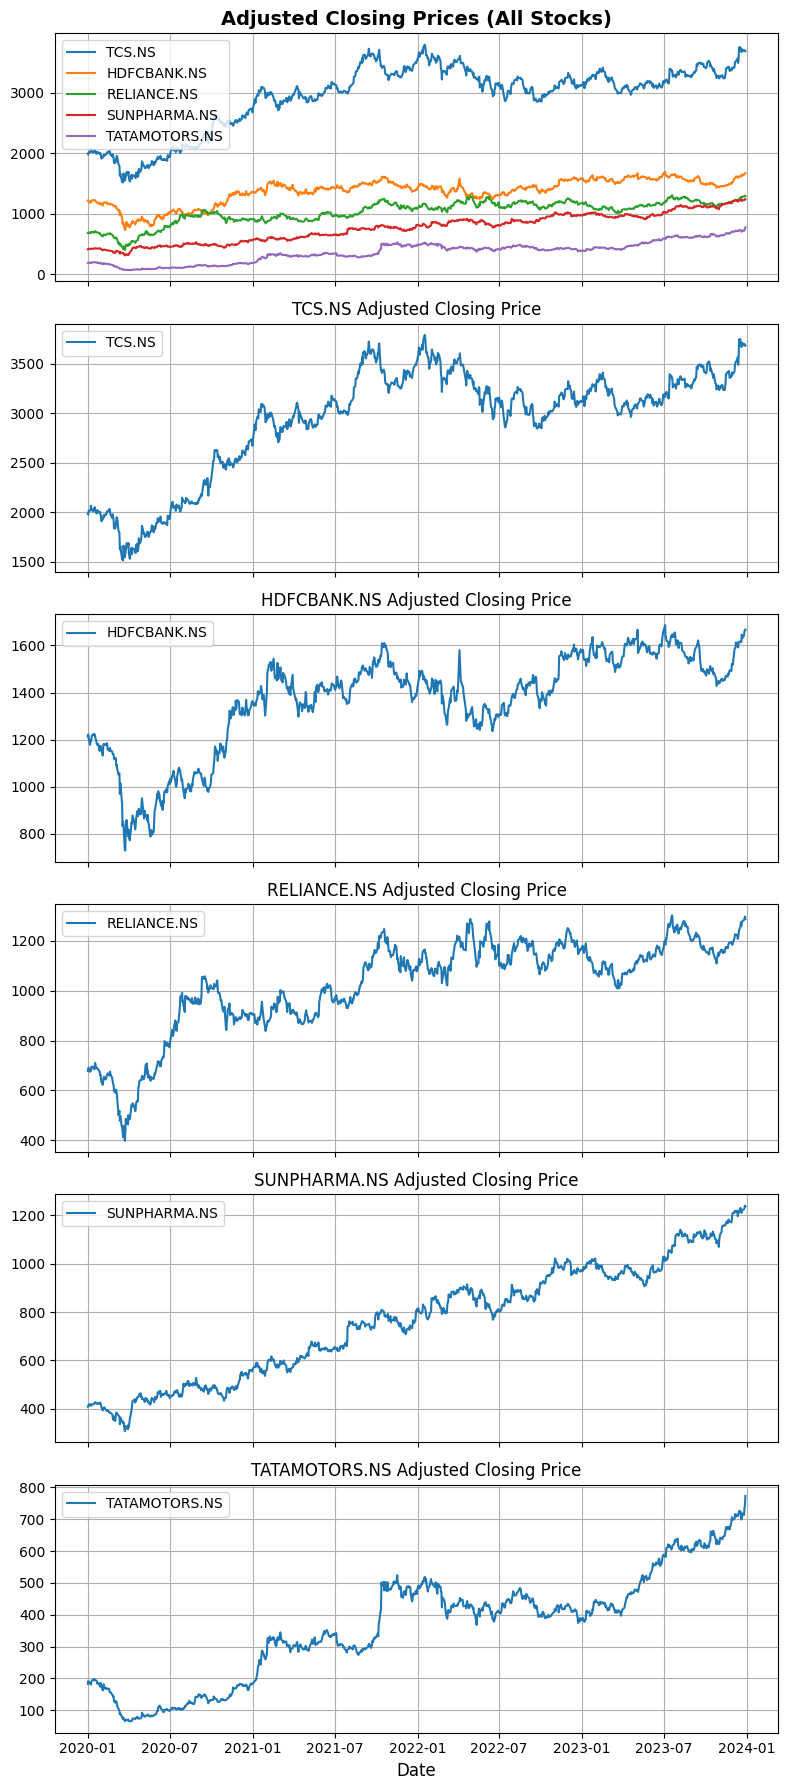

In [21]:
# Increase figure height
fig, axes = plt.subplots(len(stocks) + 1, 1, figsize=(8, 18), sharex=True, dpi=100)

# First subplot: All stocks combined
for stock in stocks:
    axes[0].plot(data.index, data[stock], label=stock)
axes[0].set_title("Adjusted Closing Prices (All Stocks)", fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid()

# Individual subplots for each stock
for i, stock in enumerate(stocks, start=1):
    axes[i].plot(data.index, data[stock], label=stock, color='tab:blue')
    axes[i].set_title(f"{stock} Adjusted Closing Price", fontsize=12)
    axes[i].grid()
    axes[i].legend()

plt.xlabel("Date", fontsize=12)
plt.tight_layout()
plt.show()

In [22]:
# Compute log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Compute statistics for log returns
stats_log_returns = pd.DataFrame({
    'Min': log_returns.min(),
    'Max': log_returns.max(),
    'Mean': log_returns.mean(),
    'Std': log_returns.std(),
    'Skewness': log_returns.skew(),
    'Kurtosis': log_returns.kurtosis()
}).round(4)

# Print results for log returns
print("\n📈 Log Returns Statistics:")
print(stats_log_returns.to_string())


📈 Log Returns Statistics:
                  Min     Max    Mean     Std  Skewness  Kurtosis
Ticker                                                           
HDFCBANK.NS   -0.1348  0.1097  0.0003  0.0179   -0.3897    8.8465
RELIANCE.NS   -0.1410  0.1373  0.0006  0.0196   -0.0123   10.5081
SUNPHARMA.NS  -0.1183  0.1045  0.0011  0.0169    0.3361    6.9103
TATAMOTORS.NS -0.1550  0.1860  0.0015  0.0283    0.3880    6.6957
TCS.NS        -0.0988  0.0939  0.0006  0.0159   -0.2334    5.4039


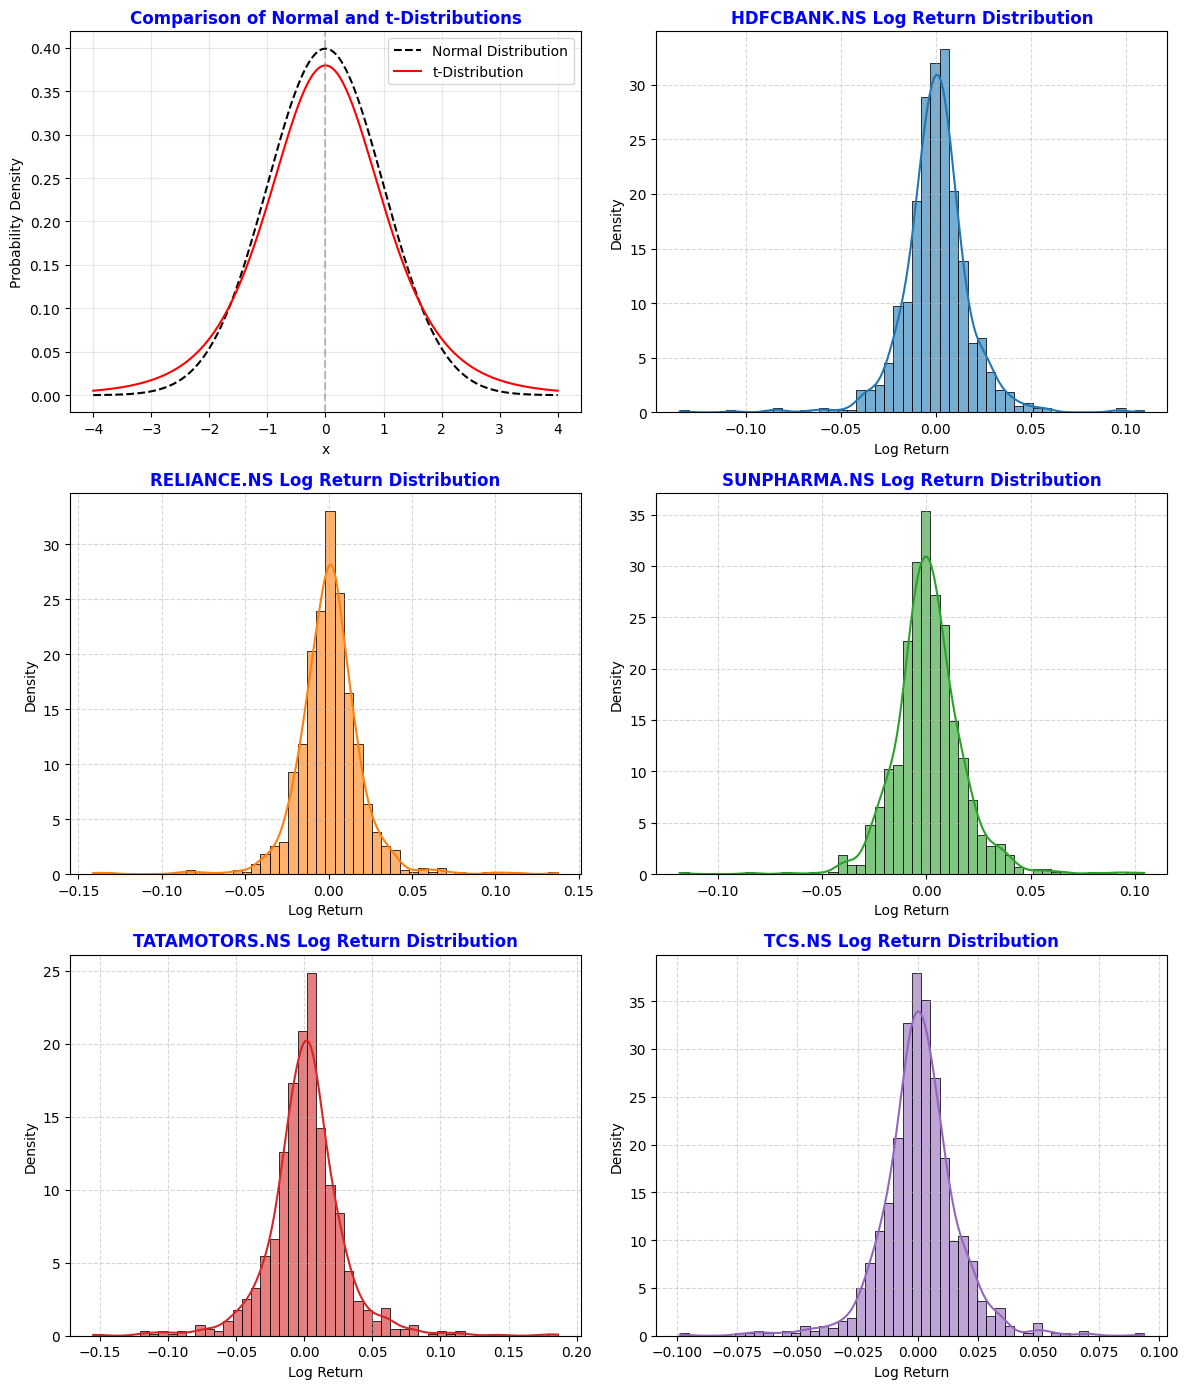

In [23]:
def plot_return_distributions(log_returns):
    num_stocks = log_returns.shape[1]
    fig, axes = plt.subplots(3, 2, figsize=(12, 14), dpi=100)
    axes = axes.flatten()

    # First subplot: Normal vs t-distribution with different degrees of freedom
    x = np.linspace(-4, 4, 1000)
    normal_pdf = st.norm.pdf(x, loc=0, scale=1)
    t_pdf_df2 = st.t.pdf(x, df=5)

    axes[0].plot(x, normal_pdf, label="Normal Distribution", color='black', linestyle='dashed')
    axes[0].plot(x, t_pdf_df2, label="t-Distribution", color='red')
    axes[0].set_title("Comparison of Normal and t-Distributions", fontsize=12, fontweight='bold', color='blue')
    axes[0].set_xlabel("x", fontsize=10)
    axes[0].set_ylabel("Probability Density", fontsize=10)
    axes[0].axvline(0, color='gray', linestyle='--', alpha=0.5)
    axes[0].legend(loc='upper right')
    axes[0].grid(alpha=0.3)

    # Remaining subplots for stock log return distributions
    for i, stock in enumerate(log_returns.columns, start=1):
        sns.histplot(log_returns[stock], bins=50, kde=True, stat="density", alpha=0.6, ax=axes[i], color=sns.color_palette("tab10")[i-1])
        axes[i].set_title(f"{stock} Log Return Distribution", fontsize=12, fontweight='bold', color='blue')
        axes[i].set_xlabel("Log Return", fontsize=10)
        axes[i].set_ylabel("Density", fontsize=10)
        axes[i].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# Execute the function
plot_return_distributions(log_returns)



Correlation Matrix :

Ticker         HDFCBANK.NS  RELIANCE.NS  SUNPHARMA.NS  TATAMOTORS.NS    TCS.NS
Ticker                                                                        
HDFCBANK.NS       1.000000     0.463431      0.295639       0.418913  0.360483
RELIANCE.NS       0.463431     1.000000      0.327153       0.413843  0.409478
SUNPHARMA.NS      0.295639     0.327153      1.000000       0.320574  0.299774
TATAMOTORS.NS     0.418913     0.413843      0.320574       1.000000  0.375340
TCS.NS            0.360483     0.409478      0.299774       0.375340  1.000000 



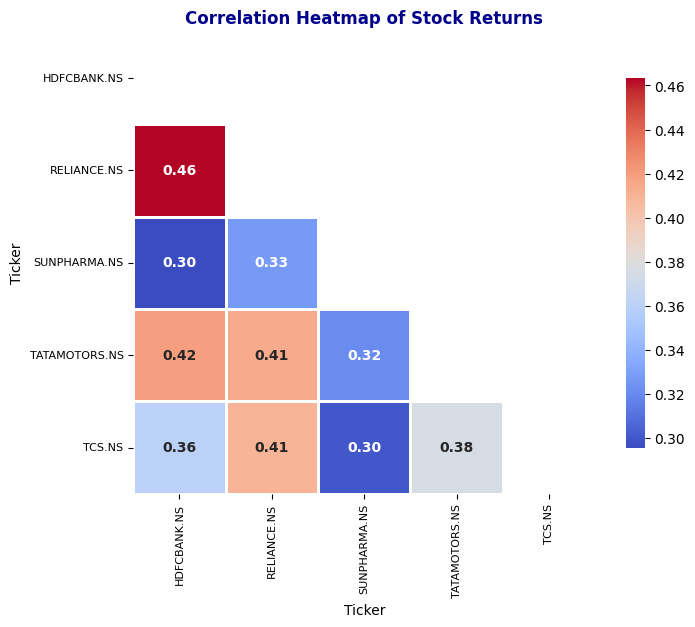

In [24]:
# ------------------------ Correlation Plot ------------------------
def plot_correlation(log_returns):
    plt.figure(figsize=(8,6), dpi=100)

    corr = log_returns.corr()

    print("\nCorrelation Matrix :\n")
    print(corr,"\n")

    mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask upper triangle for better readability

    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, mask=mask, square=True, cbar_kws={"shrink": 0.8},
                annot_kws={"size": 10, "weight": "bold"})

    plt.title("Correlation Heatmap of Stock Returns", fontsize=12, fontweight='bold', color='darkblue')
    plt.xticks(fontsize=8, rotation=90)
    plt.yticks(fontsize=8, rotation=0)
    plt.show()

plot_correlation(log_returns)

In [25]:
# ------------------------ Step 2: Computation of the Risk Metrics  -----------------------
# Assign weights to portfolio
weights = np.array([1 / len(stocks)] * len(stocks))

# Compute annualized mean return & covariance for each stocks
mean_returns = log_returns.mean() * 252
cov_matrix = log_returns.cov() * 252

# Compute portfolio returns (1D array)
portfolio_log_returns = log_returns @ weights

# Compute portfolio annualized return & risk
portfolio_return = np.dot(weights, mean_returns)
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

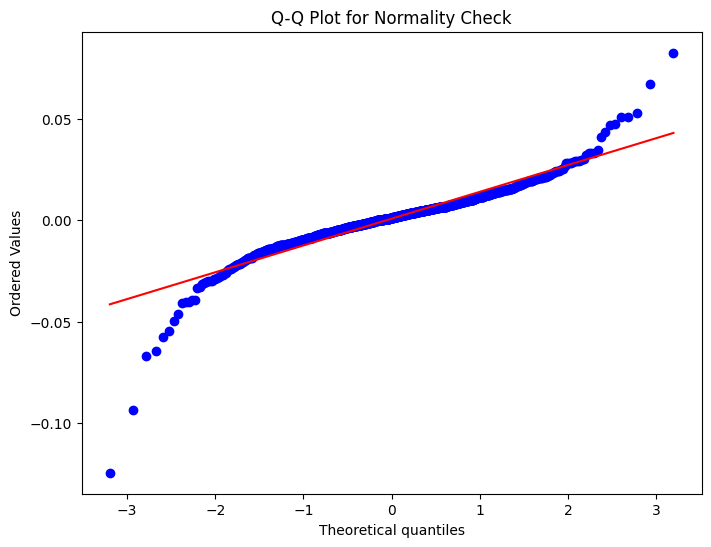

In [26]:
# ------------------------ Step 3: Normality Tests ------------------------
plt.figure(figsize=(8, 6), dpi=100)
st.probplot(portfolio_log_returns, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality Check")
plt.show()

In [27]:
# ------------------------ Step 3: Fit t-Distribution ------------------------
params_t = st.t.fit(portfolio_log_returns)
t_df, t_loc, t_scale = params_t
print(f"\nFitted t-Distribution: df={t_df:.2f}, loc={t_loc:.6f}, scale={t_scale:.6f}\n")


Fitted t-Distribution: df=3.16, loc=0.001240, scale=0.008683



In [28]:
# Normality Tests
shapiro_test = st.shapiro(portfolio_log_returns)
dagostino_test = st.normaltest(portfolio_log_returns)
jarque_bera_test = st.jarque_bera(portfolio_log_returns)

print("\n📌 Normality Test Results:")
print(f"🔸 Shapiro-Wilk Test:         Statistic={shapiro_test.statistic:.2f},    p-value={format(shapiro_test.pvalue, '.4f')}")
print(f"🔸 D’Agostino-Pearson Test:   Statistic={dagostino_test.statistic:.2f},  p-value={format(dagostino_test.pvalue, '.4f')}")
print(f"🔸 Jarque-Bera Test:          Statistic={jarque_bera_test.statistic:.2f}, p-value={format(jarque_bera_test.pvalue, '.4f')}\n")

# Kolmogorov-Smirnov Test (Normal vs. t-Distribution)
ks_test_normal = st.kstest(portfolio_log_returns, 'norm', args=(portfolio_log_returns.mean(), portfolio_log_returns.std()))
ks_test_t = st.kstest(portfolio_log_returns, 't', args=(t_df, t_loc, t_scale))

print("\n📌 Kolmogorov-Smirnov Test Results:")
print(f"🔹 K-S Test (Normal):         Statistic={ks_test_normal.statistic:.4f},  p-value={ks_test_normal.pvalue:.4f}")
print(f"🔹 K-S Test (t-Distribution): Statistic={ks_test_t.statistic:.4f},  p-value={ks_test_t.pvalue:.4f}\n")



📌 Normality Test Results:
🔸 Shapiro-Wilk Test:         Statistic=0.89,    p-value=0.0000
🔸 D’Agostino-Pearson Test:   Statistic=324.67,  p-value=0.0000
🔸 Jarque-Bera Test:          Statistic=5826.02, p-value=0.0000


📌 Kolmogorov-Smirnov Test Results:
🔹 K-S Test (Normal):         Statistic=0.0828,  p-value=0.0000
🔹 K-S Test (t-Distribution): Statistic=0.0156,  p-value=0.9661



In [29]:
# Calculate skewness
portfolio_skewness = skew(portfolio_log_returns)

# Fisher’s definition (excess kurtosis)
portfolio_kurtosis = kurtosis(portfolio_log_returns)

# Print results
print(f"\n📌 Portfolio Distribution Characteristics:")
print(f"🔹 Skewness : {portfolio_skewness:.2f}")
print(f"🔹 Kurtosis : {portfolio_kurtosis:.2f}\n")


📌 Portfolio Distribution Characteristics:
🔹 Skewness : -1.02
🔹 Kurtosis : 11.70



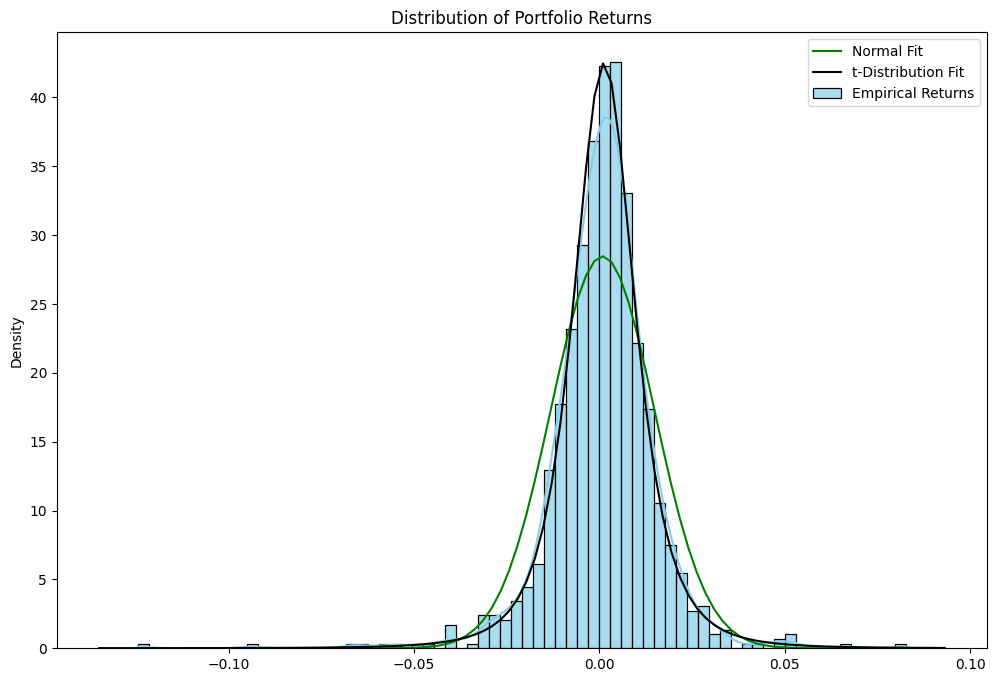

In [30]:
# ------------------------ Step 5: Portfolio Visualization ------------------------
plt.figure(figsize=(12,8), dpi=100)
sns.histplot(portfolio_log_returns, bins=70, kde=True, stat="density",
             label="Empirical Returns", color="skyblue", edgecolor="black", alpha=0.7)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Normal and t-distribution fits with custom colors
plt.plot(x, st.norm.pdf(x, np.mean(portfolio_log_returns), np.std(portfolio_log_returns)),
         'g-', label="Normal Fit")  # Green for Normal Fit
plt.plot(x, st.t.pdf(x, t_df, loc=t_loc, scale=t_scale),
         'k-', label="t-Distribution Fit")  # Black for t-Distribution Fit

plt.legend()
plt.title("Distribution of Portfolio Returns")
plt.show()


In [31]:
# ------------------------ Step 6: Compute VaR ------------------------
confidence_level = 0.99
z_score = st.norm.ppf(confidence_level)  # Standard normal Z-score

# 1️⃣ Historical VaR (Non-Parametric)
VaR_historical = -np.percentile(sorted(portfolio_log_returns), (1 - confidence_level) * 100)

# 2️⃣ Parametric VaR (Normal)
VaR_parametric_normal = z_score * portfolio_std_dev

# 3️⃣ Parametric VaR (t-Distribution)
t_critical = st.t.ppf(1 - confidence_level, df=t_df)
VaR_parametric_t = abs(t_critical * t_scale)

# 4️⃣ Monte Carlo Simulation VaR using t-distribution
simulations = 100000
simulated_returns_t = st.t.rvs(df=t_df, loc=portfolio_log_returns.mean(), scale=t_scale, size=simulations)
VaR_monte_carlo_t = abs(np.percentile(simulated_returns_t, (1 - confidence_level) * 100))

print("\n📌 Portfolio Risk Metrics:")
print(f"🔹 Portfolio Expected Annual Return: {portfolio_return:.2%}")
print(f"🔹 Portfolio Annualized Volatility : {portfolio_std_dev:.2%}")

print("\n📌 Value at Risk (VaR) Results:")
print(f"🔹 Historical VaR (Non-Parametric)       : {VaR_historical:.4f}")
print(f"🔹 Parametric VaR (Normal)               : {VaR_parametric_normal:.4f}")
print(f"🔹 Parametric VaR (t-Distribution)       : {VaR_parametric_t:.4f}")
print(f"🔹 Monte Carlo VaR (t-distribution)      : {VaR_monte_carlo_t:.4f}\n")


📌 Portfolio Risk Metrics:
🔹 Portfolio Expected Annual Return: 21.00%
🔹 Portfolio Annualized Volatility : 22.26%

📌 Value at Risk (VaR) Results:
🔹 Historical VaR (Non-Parametric)       : 0.0401
🔹 Parametric VaR (Normal)               : 0.5178
🔹 Parametric VaR (t-Distribution)       : 0.0379
🔹 Monte Carlo VaR (t-distribution)      : 0.0373

